# Exercice 1 - Clustering - Prédiction des nombres

In [102]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.cluster import KMeans

In [7]:
data = load_digits()
X = data['data']

In [9]:
X.shape

(1797, 64)

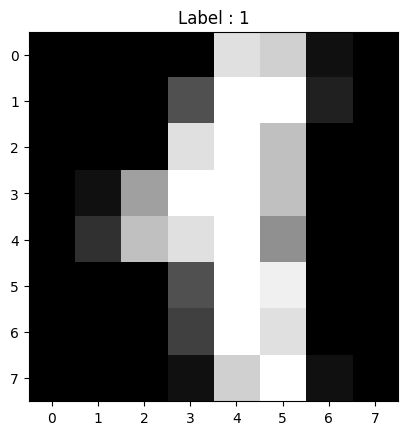

In [29]:
plt.imshow(data.images[11], cmap='gray')
plt.title(f"Label : {data.target[11]}")
plt.show()

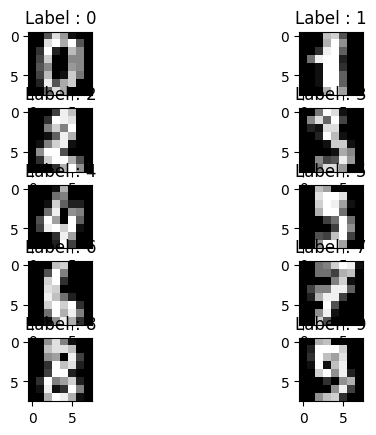

In [83]:
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(data.images[i], cmap='gray')
    plt.title(f"Label : {data.target[i]}")

plt.show()


In [84]:
kmeans = KMeans(n_clusters=10)
kmeans.fit_predict(X)


array([0, 4, 1, ..., 4, 6, 6], dtype=int32)

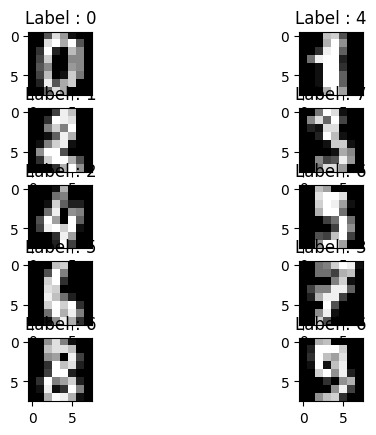

In [85]:
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(data.images[i], cmap='gray')
    plt.title(f"Label : {kmeans.labels_[i]}")

plt.show()

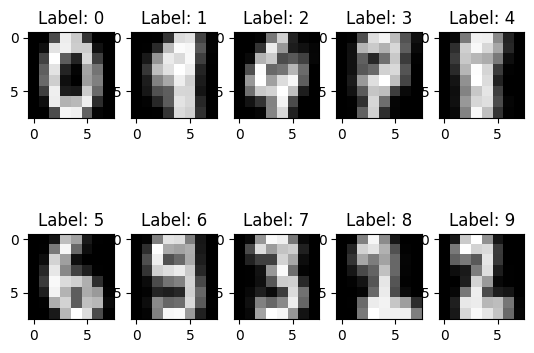

In [86]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(kmeans.cluster_centers_[i].reshape(8,8), cmap='gray')
    plt.title(f"Label: {i}")

plt.show()

# Exercice 2 : Clustering - Recherche du paramètre k optimal


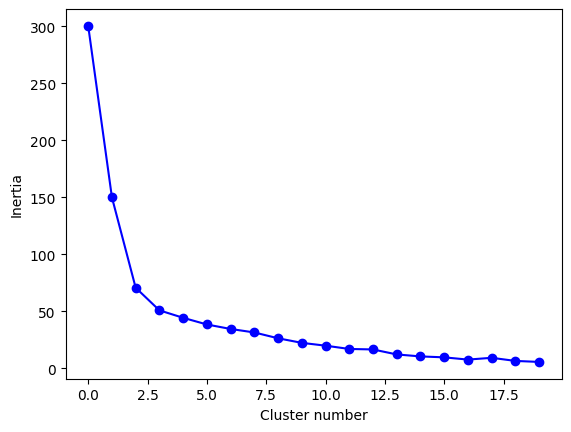

In [124]:
from scipy.spatial.distance import cdist

def get_inertia_plot(dataset, max_cluster):
    inertia_list = []

    for i in range(max_cluster):
        kmeans = KMeans(n_clusters=i+1)
        kmeans.fit_predict(dataset)
        inertia_list.append(kmeans.inertia_)

    plt.figure()
    plt.ylabel('Inertia')
    plt.xlabel('Cluster number')
    plt.plot(inertia_list, 'bo-')

    return inertia_list


inertias = get_inertia_plot(X, 20)



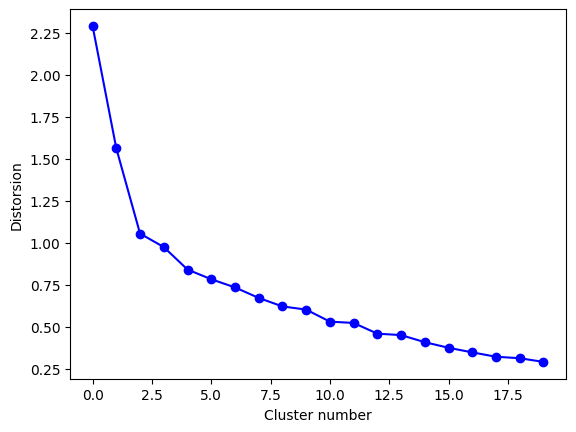

In [125]:
from scipy.spatial.distance import cdist

def get_distorsion_plot(dataset, max_clusters):
    distorsion_list = []

    for i in range(max_clusters):
        kmeans = KMeans(n_clusters=i+1)
        kmeans.fit_predict(dataset)
        distorsion = np.mean(np.min(cdist(dataset, kmeans.cluster_centers_, 'euclidean'), axis=1))
        distorsion_list.append(distorsion)

    plt.figure()
    plt.ylabel('Distorsion')
    plt.xlabel('Cluster number')
    plt.plot(distorsion_list, 'bo-')

    return distorsion_list

distorsions = get_distorsion_plot(X, 20)

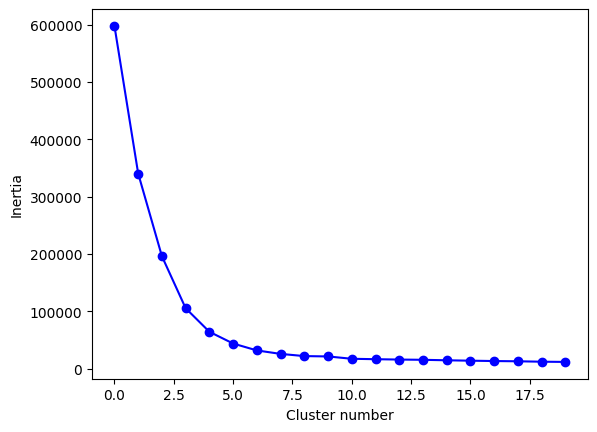

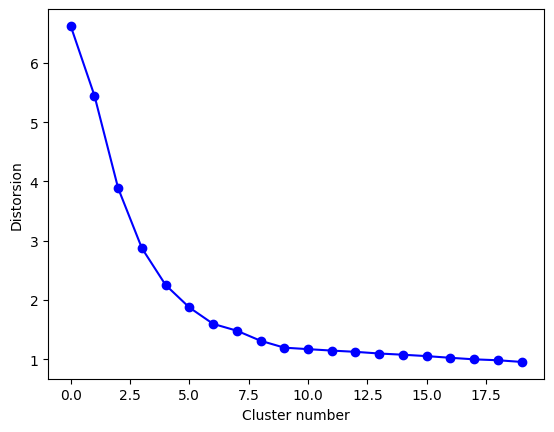

In [127]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=10000, centers=10, n_features=2, random_state=0)

inertias = get_inertia_plot(X, 20)
distorsions = get_distorsion_plot(X, 20)

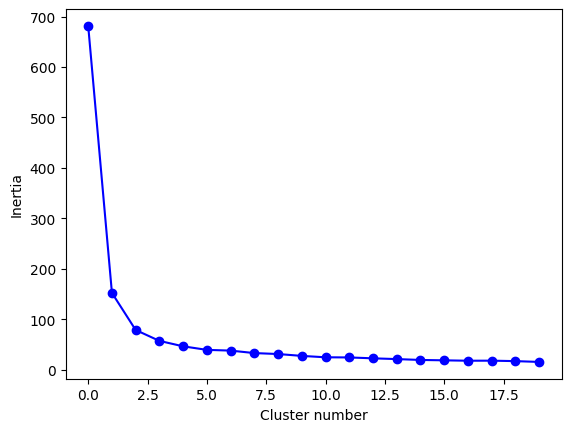

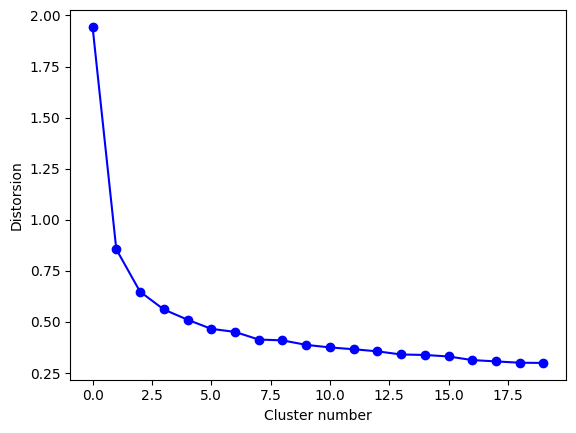

In [129]:
from sklearn.datasets import load_iris

data = load_iris()
X = data['data']

inertias = get_inertia_plot(X, 20)
distorsions = get_distorsion_plot(X, 20)

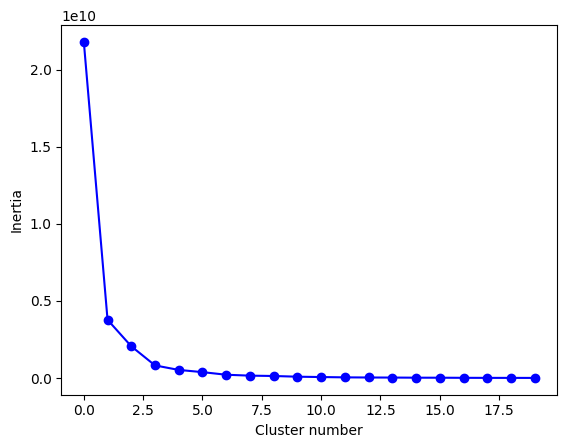

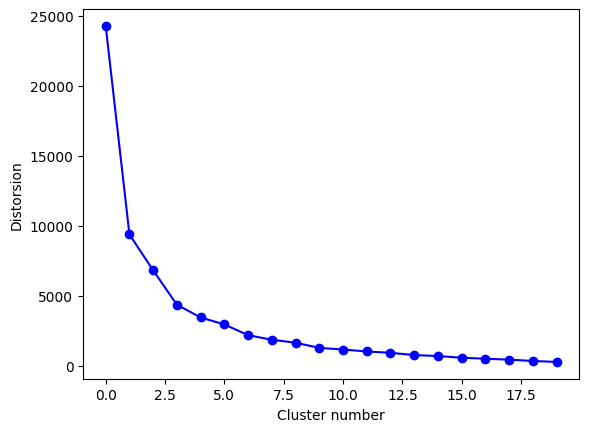

In [130]:
df = pd.read_csv('Salary_Data.csv')

inertias = get_inertia_plot(df, 20)
distorsions = get_distorsion_plot(df, 20)

# Exercice 5 - Clustering - Autres méthodes de clustering

In [138]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=3, n_classes=2, n_clusters_per_class=1, n_redundant=0)


[np.float64(1.6830271144786861),
 np.float64(1.3121263440844506),
 np.float64(1.1688821307218713),
 np.float64(1.0173278554767322),
 np.float64(0.9338265986532708),
 np.float64(0.8695532045352069),
 np.float64(0.8213689544269239),
 np.float64(0.7849839736068104),
 np.float64(0.7535343406489526),
 np.float64(0.7219967589400293),
 np.float64(0.6885730125097478),
 np.float64(0.6699701740407101),
 np.float64(0.6431062355112304),
 np.float64(0.6370272628855639),
 np.float64(0.6007172070765935),
 np.float64(0.6014461444561106),
 np.float64(0.5817912897962361),
 np.float64(0.5644545219392283),
 np.float64(0.5564377353832614),
 np.float64(0.5418493122880405)]

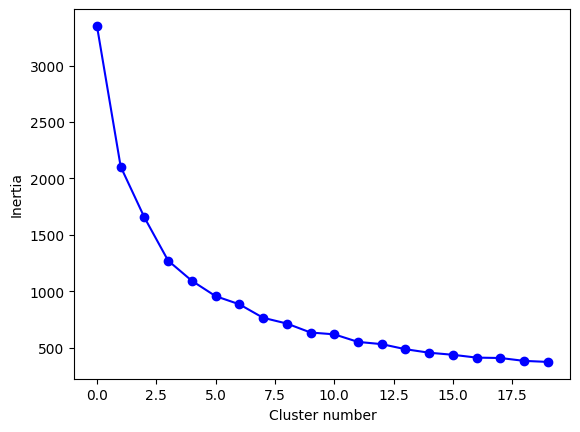

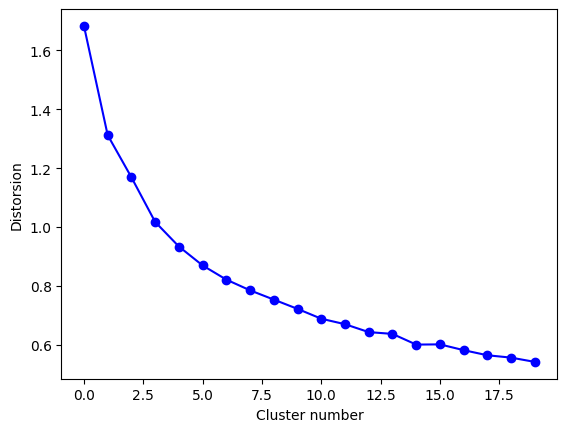

In [139]:
# KMeans
get_inertia_plot(X, 20)
get_distorsion_plot(X, 20)

In [147]:
# DBScan
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score

dbscan = DBSCAN()
dbscan.fit_predict(X)
print(accuracy_score(y, dbscan.labels_))


0.476
